In [ ]:
import turicreate
print("hello")

In [3]:
sales = Philadelphia_Crime_Rate_noNA.csv

Downloading https://courses.cs.washington.edu/courses/cse416/18sp/notebooks/Philadelphia_Crime_Rate_noNA.csv to /var/tmp/turicreate-bruce/4524/56964d77-89e5-479f-9603-ef2867fb43b1.csv

Finished parsing file https://courses.cs.washington.edu/courses/cse416/18sp/notebooks/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.044179 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file https://courses.cs.washington.edu/courses/cse416/18sp/notebooks/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.035675 secs.

In [5]:
turicreate.show(sales["CrimeRate"], sales["HousePrice"])

Materializing X axis SArray

Materializing Y axis SArray

In [6]:
crime_model = turicreate.linear_regression.create(
    sales,
    target="HousePrice",
    features=['CrimeRate'],
    validation_set=None,
    verbose=False
)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

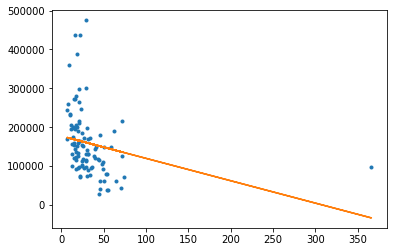

In [8]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
        sales['CrimeRate'],crime_model.predict(sales),'-')

In [9]:
sales_noCC = sales[sales['MilesPhila'] != 0.0] 

In [10]:
turicreate.show(sales_noCC['CrimeRate'], sales_noCC['HousePrice'])

Materializing X axis SArray

Materializing Y axis SArray

In [11]:
crime_model_noCC = turicreate.linear_regression.create(
    sales_noCC,
    target='HousePrice',
    features=['CrimeRate'],
    validation_set = None,
    verbose = False
)

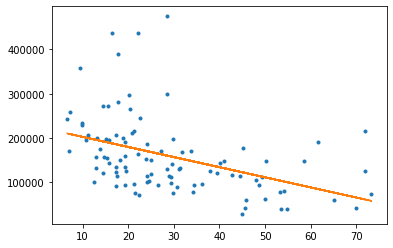

In [12]:
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.',
         sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC), '-')

In [13]:
crime_model.coefficients

name,index,value,stderr
(intercept),None,176626.04688088183,11245.588219378817
CrimeRate,None,-576.8049490581076,226.9022595096533


In [14]:
crime_model_noCC.coefficients

name,index,value,stderr
(intercept),None,225204.60430309843,16404.02475138665
CrimeRate,None,-2287.6971744328944,491.53747812308944


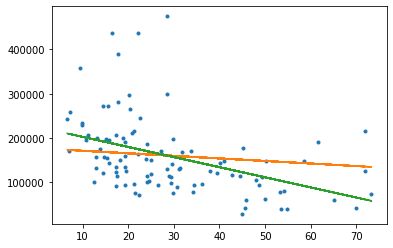

In [15]:
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.',
         sales_noCC['CrimeRate'], crime_model.predict(sales_noCC), '-',
         sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC), '-')

In [16]:
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000]
crime_model_nohighend = turicreate.linear_regression.create(
    sales_nohighend,
    target='HousePrice',
    features=['CrimeRate'],
    validation_set=None,
    verbose=False
)

In [17]:
crime_model_noCC.coefficients

name,index,value,stderr
(intercept),None,225204.60430309843,16404.02475138665
CrimeRate,None,-2287.6971744328944,491.53747812308944


In [18]:
crime_model_nohighend.coefficients

name,index,value,stderr
(intercept),None,199073.5896152512,11932.510110455862
CrimeRate,None,-1837.712809888722,351.5196093328531


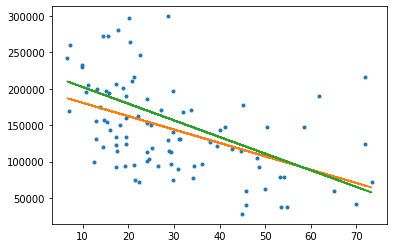

In [19]:
plt.plot(sales_nohighend['CrimeRate'], sales_nohighend['HousePrice'], '.',
         sales_nohighend['CrimeRate'], crime_model_nohighend.predict(sales_nohighend), '-',
         sales_nohighend['CrimeRate'], crime_model_noCC.predict(sales_nohighend), '-')         